In [3]:
# Data Manipulation
import pandas as pd
import numpy as np

# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Linear Regression and Model Evaluation
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Statistical Analysis
import statsmodels.api as sm

In [5]:
df = pd.read_csv('/Users/vishal/Desktop/CSV files/LRA.csv')

In [7]:
df.head()

,Age,Eduacation,Race,Hisp,MaritalStatus,Nodeg,Earnings_1974,Earnings_1975,Earnings_1978
0,45,LessThanHighSchool,NotBlack,NotHispanic,Married,1,21516.670,25243.550,25564.670
1,21,Intermediate,NotBlack,NotHispanic,NotMarried,0,3175.971,5852.565,13496.080
2,38,HighSchool,NotBlack,NotHispanic,Married,0,23039.020,25130.760,25564.670
3,48,LessThanHighSchool,NotBlack,NotHispanic,Married,1,24994.370,25243.550,25564.670
4,18,LessThanHighSchool,NotBlack,NotHispanic,Married,1,1669.295,10727.610,9860.869


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15992 entries, 0 to 15991
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Age            15992 non-null  int64  
 1   Eduacation     15992 non-null  object 
 2   Race           15992 non-null  object 
 3   Hisp           15992 non-null  object 
 4   MaritalStatus  15992 non-null  object 
 5   Nodeg          15992 non-null  int64  
 6   Earnings_1974  15992 non-null  float64
 7   Earnings_1975  15992 non-null  float64
 8   Earnings_1978  15992 non-null  float64
dtypes: float64(3), int64(2), object(4)
memory usage: 1.1+ MB


In [11]:
# Encode categorical variables
df['Race'] = df['Race'].apply(lambda x: 1 if x == 'Black' else 0)
df['Hisp'] = df['Hisp'].apply(lambda x: 1 if x == 'Yes' else 0)
df['MaritalStatus'] = df['MaritalStatus'].apply(lambda x: 1 if x == 'Yes' else 0)

# Check for missing values
print(df.isnull().sum())

# Fill missing values (if any) or drop rows with missing data
df = df.dropna()

# Confirm all columns are numeric
print(df.dtypes)


Age              0
Eduacation       0
Race             0
Hisp             0
MaritalStatus    0
Nodeg            0
Earnings_1974    0
Earnings_1975    0
Earnings_1978    0
dtype: int64
Age                int64
Eduacation        object
Race               int64
Hisp               int64
MaritalStatus      int64
Nodeg              int64
Earnings_1974    float64
Earnings_1975    float64
Earnings_1978    float64
dtype: object


# Split the Data

In [14]:
# Define features and target variable
X = df[['Age', 'Eduacation', 'Race', 'Hisp', 'MaritalStatus', 'Nodeg', 'Earnings_1974', 'Earnings_1975']]
y = df['Earnings_1978']

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check the shape of the training and test data
print("Training Features Shape:", X_train.shape)
print("Test Features Shape:", X_test.shape)


Training Features Shape: (12793, 8)
Test Features Shape: (3199, 8)


In [28]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

# Encode the 'Eduacation' column
df['Eduacation'] = label_encoder.fit_transform(df['Eduacation'])

# Check the unique values after encoding
print(df['Eduacation'].unique())

[2 1 0 4 3]


In [31]:
# Check for missing values
print(df.isnull().sum())

# If there are missing values, you can fill or drop them
df = df.dropna()  # or df.fillna(0) to replace NaN values with 0


Age              0
Eduacation       0
Race             0
Hisp             0
MaritalStatus    0
Nodeg            0
Earnings_1974    0
Earnings_1975    0
Earnings_1978    0
dtype: int64


#  Train the Linear Regression Model

In [33]:
# Define features and target variable
X = df[['Age', 'Eduacation', 'Race', 'Hisp', 'MaritalStatus', 'Nodeg', 'Earnings_1974', 'Earnings_1975']]
y = df['Earnings_1978']

# Split the dataset into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Linear Regression model
from sklearn.linear_model import LinearRegression
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Display model coefficients and intercept
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)


Coefficients: [-1.06064450e+02  2.92200813e+02 -1.41562873e-11  5.68434189e-14
  2.27373675e-13 -7.06070729e+02  2.84615393e-01  4.76641639e-01]
Intercept: 7727.940992304704


# Evaluate the Model

In [35]:
# Make predictions
y_pred = model.predict(X_test)

# Calculate performance metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("R-squared Score:", r2)


Mean Squared Error (MSE): 48659673.11996129
R-squared Score: 0.4763487000980384


# Interpret the Results


### Feature Coefficients

In [37]:
coefficients = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_
})
print(coefficients)


         Feature   Coefficient
0            Age -1.060644e+02
1     Eduacation  2.922008e+02
2           Race -1.415629e-11
3           Hisp  5.684342e-14
4  MaritalStatus  2.273737e-13
5          Nodeg -7.060707e+02
6  Earnings_1974  2.846154e-01
7  Earnings_1975  4.766416e-01


### Scatter Plot: Actual vs Predicted

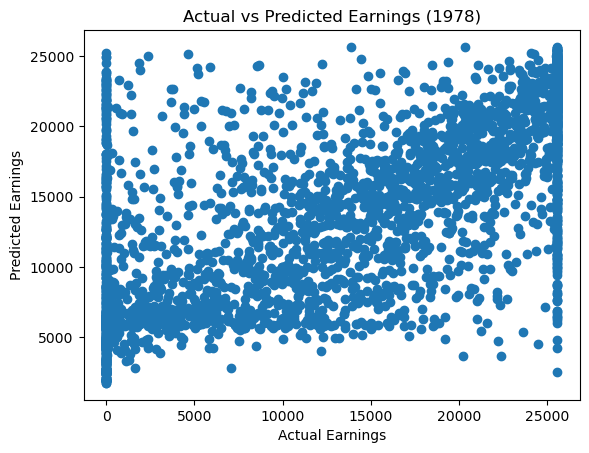

In [40]:
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Earnings")
plt.ylabel("Predicted Earnings")
plt.title("Actual vs Predicted Earnings (1978)")
plt.show()


### Residual Plot

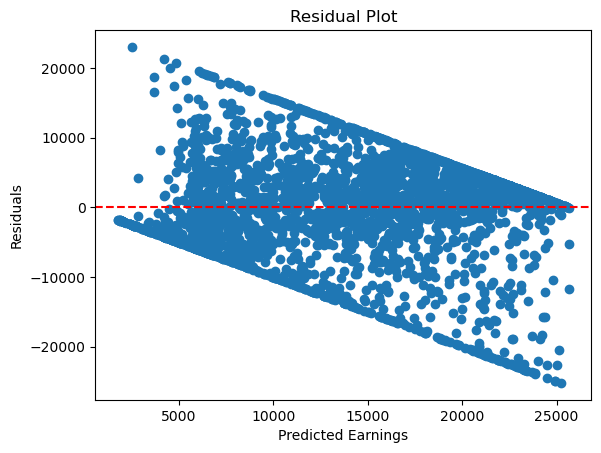

In [43]:
residuals = y_test - y_pred

plt.scatter(y_pred, residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Predicted Earnings")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.show()


###  Predict for New Data



In [46]:
# Example new data
new_data = pd.DataFrame({
    'Age': [35],
    'Eduacation': [16],
    'Race': [0],
    'Hisp': [1],
    'MaritalStatus': [1],
    'Nodeg': [0],
    'Earnings_1974': [20000],
    'Earnings_1975': [22000]
})

# Predict earnings for 1978
predicted_earnings = model.predict(new_data)
print("Predicted Earnings for 1978:", predicted_earnings)

Predicted Earnings for 1978: [24869.3221843]
